<a href="https://colab.research.google.com/github/suzannelittle/ca682i/blob/master/notebooks/3_4_9_DUB_weather_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Graph of weather at Dublin airport

Data from: https://www.met.ie/climate/available-data/monthly-data which leads to https://prodapi.metweb.ie/monthly-data/Dublin%20Airport that returns the Dublin Airport station data as a JSON file.

Used for Quiz in Step 3.4 of CA682I

In [1]:
# standard imports

import pandas as pd
import numpy as np

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.transform import jitter

output_notebook()

In [2]:
# get data

df = pd.read_json("https://prodapi.metweb.ie/monthly-data/Dublin%20Airport")

In [3]:
df.head()

,station,up_to,total_rainfall,mean_temperature,soil_temperature,solar_radiation,potential_evapotranspiration,evaporation,degree_days_below_fiften_point_five_degrees_celsius
report,Dublin Airport,22-08-2020,"{'2020': {'january': '36.0', 'february': '130....","{'2020': {'january': '6.3', 'february': '5.8',...","{'2020': {'january': '4.4', 'february': '3.9',...","{'2020': {'january': '7855', 'february': '1471...","{'2020': {'january': '17.0', 'february': '23.6...","{'2020': {'january': '21.1', 'february': '33.6...","{'2020': {'january': '284', 'february': '282',..."


In [4]:
rain = pd.DataFrame(df['total_rainfall']['report'])

In [5]:
rain.head()

,2020,2019,2018,2017,mean
january,36.0,26.8,93.1,21.9,62.6
february,130.4,30.5,36.9,41.6,48.8
mar,31.8,92.5,100.0,67.2,52.6
apr,12.8,74.6,68.9,10.0,54.1
may,9.3,33.4,19.1,43.5,59.5


In [6]:
temperature = pd.DataFrame(df['mean_temperature']['report'])

In [7]:
temperature['2019']

january       5.1
february      7.0
mar           7.3
apr           8.0
may          10.2
june         12.5
july         15.9
august       15.4
september    13.0
october       9.1
november      6.0
december      5.9
annual        9.6
Name: 2019, dtype: object

In [8]:
# create a new plot with default tools, using figure
p = figure(plot_width=400, plot_height=400)

p.circle([float(x) for x in temperature['2019']], [float(y) for y in rain['2019']], size=5)
p.triangle([float(x) for x in temperature['2018']], [float(y) for y in rain['2018']], size=5, color='red')
show(p)

In [9]:
temperature['2020'] = temperature['2020'].replace('', np.NaN)

In [10]:
for c in temperature.columns:
  temperature[c] = temperature[c].astype('float')

In [11]:
temperature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, january to annual
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2020    9 non-null      float64
 1   2019    13 non-null     float64
 2   2018    13 non-null     float64
 3   2017    13 non-null     float64
 4   mean    13 non-null     float64
dtypes: float64(5)
memory usage: 1.2+ KB


In [12]:
temperature['2020']

january       6.3
february      5.8
mar           5.8
apr           8.5
may          10.9
june         13.4
july         14.4
august       15.5
september     NaN
october       NaN
november      NaN
december      NaN
annual        9.9
Name: 2020, dtype: float64

In [13]:
rain['2020'] = rain['2020'].replace('', np.NaN)

In [14]:
for c in rain.columns:
  rain[c] = rain[c].astype('float')

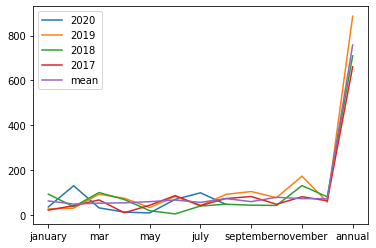

In [15]:
rain.plot()

In [16]:
rain = rain.drop('annual')

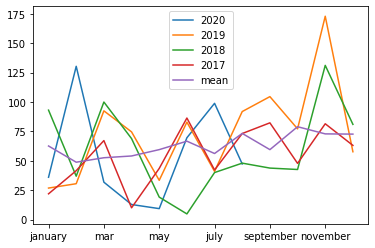

In [17]:
rain.plot()

# Example dot plot using elements

In [ ]:
import pandas as pd

from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, output_file, show
from bokeh.sampledata.periodic_table import elements

elements = elements.copy()
elements = elements[elements["atomic number"] <= 82]
elements = elements[~pd.isnull(elements["melting point"])]
mass = [float(x.strip("[]")) for x in elements["atomic mass"]]
elements["atomic mass"] = mass

palette = ["#053061", "#2166ac", "#4393c3", "#92c5de", "#d1e5f0",
           "#f7f7f7", "#fddbc7", "#f4a582", "#d6604d", "#b2182b", "#67001f"]

melting_points = elements["melting point"]
low = min(melting_points)
high = max(melting_points)
melting_point_inds = [int(10*(x-low)/(high-low)) for x in melting_points] #gives items in colors a value from 0-10
elements['melting_colors'] = [palette[i] for i in melting_point_inds]

TITLE = "Density vs Atomic Weight of Elements (colored by melting point)"
TOOLS = "hover,pan,wheel_zoom,box_zoom,reset,save"

p = figure(tools=TOOLS, toolbar_location="above", plot_width=1200, title=TITLE)
p.toolbar.logo = "grey"
p.background_fill_color = "#dddddd"
p.xaxis.axis_label = "atomic weight (amu)"
p.yaxis.axis_label = "density (g/cm^3)"
p.grid.grid_line_color = "white"
p.hover.tooltips = [
    ("name", "@name"),
    ("symbol:", "@symbol"),
    ("density", "@density"),
    ("atomic weight", "@{atomic mass}"),
    ("melting point", "@{melting point}")
]

source = ColumnDataSource(elements)

p.circle("atomic mass", "density", size=12, source=source,
         color='melting_colors', line_color="black", fill_alpha=0.8)

labels = LabelSet(x="atomic mass", y="density", text="symbol", y_offset=8,
                  text_font_size="11px", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(labels)

output_file("elements.html", title="elements.py example")

show(p)

# Back to Dublin weather

In [ ]:
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.sampledata.commits import data
from bokeh.transform import jitter

output_file("categorical_scatter_jitter.html")

DAYS = ['Sun', 'Sat', 'Fri', 'Thu', 'Wed', 'Tue', 'Mon']

source = ColumnDataSource(data)

p = figure(plot_width=800, plot_height=300, y_range=DAYS, x_axis_type='datetime',
           title="Commits by Time of Day (US/Central) 2012-2016")

p.circle(x='time', y=jitter('day', width=0.6, range=p.y_range),  source=source, alpha=0.3)

p.xaxis.formatter.days = ['%Hh']
p.x_range.range_padding = 0
p.ygrid.grid_line_color = None

show(p)

In [18]:
temperature = temperature.drop('annual')

Graphing will consist of 8 plots  
colour = [2020, 2019, 2018, 2017]  
For each year in 2017,2020:  
 - Rainfall: marker=circle, colour=year  
 - Temp: marker=triangle, colour=year  

X axis should be Months   
Shared Y axis of temp (oC) and rainfall (mm)

In [19]:
temperature.index

Index(['january', 'february', 'mar', 'apr', 'may', 'june', 'july', 'august',
       'september', 'october', 'november', 'december'],
      dtype='object')

In [20]:
months = [x.capitalize()[:3] for x in temperature.index]


In [21]:
source = ColumnDataSource(temperature)

In [22]:
years = ['2020', '2019', '2018', '2017']

In [62]:
TITLE = "Dublin Monthly Rainfall and Temperature (2017-August 2020)"
TOOLS = "hover,pan,wheel_zoom,box_zoom,reset,save"

from bokeh.colors import RGB
from bokeh.models import Span, Label

COLOURS = {'2020':RGB(93,165,218), '2019':RGB(250,164,58), '2018':RGB(96,189,104), '2017':RGB(178,118,178)}
SIZE = 10
ALPHA = 0.6

p = figure(plot_width=600, plot_height=600, x_range=months, #y_axis_type='float64',
           title=TITLE, tools=TOOLS)
p.toolbar.logo = "grey"
#p.background_fill_color = "#dddddd"
p.xaxis.axis_label = "Month"
p.yaxis.axis_label = "Temperature (triangle), Rainfall (dot)"
p.grid.grid_line_color = "#dddddd"
#p.hover.tooltips = [
#    ("year", "@{atomic mass}"),
#    ("melting point", "@{melting point}")
#]

for year in years:
#  p.circle(x=months, y=jitter('rainfall', width=0.3, range=rain[year]), alpha=0.3, color=colours[year])
#  p.triangle(x='index', y=jitter('2019', width=0.3), alpha=0.3, color=COLOURS[year], source=sourceT)
  p.circle(months, rain[year], alpha=0.6, color=COLOURS[year], size=SIZE, legend_label=year)
  p.triangle(months, temperature[year], alpha=0.3, color=COLOURS[year], size=SIZE)


#p.circle(months, rain['2019'], alpha=0.3, color='red')
#p.triangle(months, temperature['2019'], alpha=0.3, color='blue')

optimum_temp_line = Span(location=14,
                              dimension='width', line_color='green',
                              #line_dash='dashed', 
                              line_width=1)
optimum_temp_label = Label(x=1, y=50, x_units='screen', y_units='screen',
                 text='14°', render_mode='css',
                 #border_line_color='black', border_line_alpha=1.0,
                 background_fill_color='white', background_fill_alpha=1.0)
p.add_layout(optimum_temp_line)
p.add_layout(optimum_temp_label)


show(p)

In [ ]:
print(months)

['January', 'February', 'Mar', 'Apr', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


In [ ]:
rain['2019']

january       26.8
february      30.5
mar           92.5
apr           74.6
may           33.4
june          82.9
july          41.0
august        91.9
september    104.6
october       77.2
november     173.0
december      57.7
Name: 2019, dtype: float64

In [ ]:
from bokeh.layouts import column
from bokeh.plotting import figure, output_file, show
from bokeh.sampledata.autompg import autompg
from bokeh.transform import jitter

years = sorted(autompg.yr.unique())

p1 = figure(plot_width=600, plot_height=300, title="Years vs mpg without jittering")
p1.xgrid.grid_line_color = None
p1.xaxis.ticker = years
p1.circle(x='yr', y='mpg', size=9, alpha=0.4, source=autompg)

p2 = figure(plot_width=600, plot_height=300, title="Years vs mpg with jittering")
p2.xgrid.grid_line_color = None
p2.xaxis.ticker = years
p2.circle(x=jitter('yr', 0.4), y='mpg', size=9, alpha=0.4, source=autompg)

output_file("jitter.html")

show(column(p1, p2))

In [ ]:
type(autompg)

pandas.core.frame.DataFrame

In [ ]:
autompg.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
rain.head()

,2020,2019,2018,2017,mean
january,36.0,26.8,93.1,21.9,62.6
february,130.4,30.5,36.9,41.6,48.8
mar,31.8,92.5,100.0,67.2,52.6
apr,12.8,74.6,68.9,10.0,54.1
may,9.3,33.4,19.1,43.5,59.5


In [ ]:
temperature.head()

,2020,2019,2018,2017,mean
january,6.3,5.1,5.3,5.7,5.3
february,5.8,7.0,3.4,6.2,5.3
mar,5.8,7.3,4.3,7.7,6.7
apr,8.5,8.0,8.1,8.0,8.1
may,10.9,10.2,11.4,11.6,10.7


In [ ]:
pd.join(rain, temperature)

AttributeError: ignored

In [ ]:
index = pd.MultiIndex.from_tuples([(m, "Rain") for m in months]+[(m, "Temp") for m in months], names=["Month", "Measure"])

In [ ]:
index

MultiIndex([('Jan', 'Rain'),
            ('Feb', 'Rain'),
            ('Mar', 'Rain'),
            ('Apr', 'Rain'),
            ('May', 'Rain'),
            ('Jun', 'Rain'),
            ('Jul', 'Rain'),
            ('Aug', 'Rain'),
            ('Sep', 'Rain'),
            ('Oct', 'Rain'),
            ('Nov', 'Rain'),
            ('Dec', 'Rain'),
            ('Jan', 'Temp'),
            ('Feb', 'Temp'),
            ('Mar', 'Temp'),
            ('Apr', 'Temp'),
            ('May', 'Temp'),
            ('Jun', 'Temp'),
            ('Jul', 'Temp'),
            ('Aug', 'Temp'),
            ('Sep', 'Temp'),
            ('Oct', 'Temp'),
            ('Nov', 'Temp'),
            ('Dec', 'Temp')],
           names=['Month', 'Measure'])

In [ ]:
TOOLS = "hover,pan,wheel_zoom,box_zoom,reset,save"

COLOURS = {'2020':'blue', '2019':'green', '2018':'red', '2017':'purple'}
SIZE = 10
ALPHA = 0.6

source = ColumnDataSource(rain)

p1 = figure(plot_width=600, plot_height=300, title="Dublin Monthly Rainfall")
#p1.xgrid.grid_line_color = None
#p1.xaxis.ticker = years
p1.circle(x='index', y='2017', size=SIZE, alpha=ALPHA, source=source)

#p2 = figure(plot_width=600, plot_height=300, title="Dublin Monthly Temperature")
#p2.xgrid.grid_line_color = None
#p2.xaxis.ticker = years
#p2.triangle(x=jitter(months, 0.4), y='2017', size=SIZE, alpha=ALPHA, source=temperature)

show(p1)

In [ ]:
source.data

{'2017': array([21.9, 41.6, 67.2, 10. , 43.5, 86.4, 42.2, 73.2, 82.3, 47.8, 81.5,
        63.1]),
 '2018': array([ 93.1,  36.9, 100. ,  68.9,  19.1,   4.8,  40. ,  48. ,  43.8,
         42.6, 131.2,  81. ]),
 '2019': array([ 26.8,  30.5,  92.5,  74.6,  33.4,  82.9,  41. ,  91.9, 104.6,
         77.2, 173. ,  57.7]),
 '2020': array([ 36. , 130.4,  31.8,  12.8,   9.3,  69.6,  86.1,   nan,   nan,
          nan,   nan,   nan]),
 'index': array(['january', 'february', 'mar', 'apr', 'may', 'june', 'july',
        'august', 'september', 'october', 'november', 'december'],
       dtype=object),
 'mean': array([62.6, 48.8, 52.6, 54.1, 59.5, 66.7, 56.2, 73.3, 59.5, 79. , 72.9,
        72.7])}

In [24]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, january to december
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2020    8 non-null      float64
 1   2019    12 non-null     float64
 2   2018    12 non-null     float64
 3   2017    12 non-null     float64
 4   mean    12 non-null     float64
dtypes: float64(5)
memory usage: 576.0+ bytes


In [25]:
temperature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, january to december
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2020    8 non-null      float64
 1   2019    12 non-null     float64
 2   2018    12 non-null     float64
 3   2017    12 non-null     float64
 4   mean    12 non-null     float64
dtypes: float64(5)
memory usage: 576.0+ bytes


In [27]:
temperature["2020"]

january       6.3
february      5.8
mar           5.8
apr           8.5
may          10.9
june         13.4
july         14.4
august       15.5
september     NaN
october       NaN
november      NaN
december      NaN
Name: 2020, dtype: float64

In [28]:
sourceR = ColumnDataSource(rain)

In [29]:
sourceR

ColumnDataSource(id='1358', ...)

In [30]:
sourceT = ColumnDataSource(temperature)

In [31]:
sourceT.column_names

['index', '2020', '2019', '2018', '2017', 'mean']

In [33]:
from bokeh.layouts import column
from bokeh.plotting import figure, output_file, show
from bokeh.transform import jitter

years = ["2017", "2018", "2019", "2020"]

p1 = figure(plot_width=600, plot_height=300, title="Years vs mpg with jittering")
p1.xgrid.grid_line_color = None
#p1.xaxis.ticker = years
p1.circle(x=jitter('index', 0.4), y='2019', size=9, alpha=0.4, source=sourceT)

output_file("jitter.html")

show(p1)

In [42]:
autompg.columns

Index(['mpg', 'cyl', 'displ', 'hp', 'weight', 'accel', 'yr', 'origin', 'name'], dtype='object')

In [43]:
autompg.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
